In [1]:
import seaborn as sns
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
ALGORITHMS = ['hist', 'lblint_ix', 'bib', 'tang', 'sed', 'lblint']
BASEPATH = '/home/lukas/school/ted-ds'

In [7]:
from os.path import exists

def load_dataset(dataset: str, threshold: int):
    algorithm_times = dict()
    for ALG in ALGORITHMS:
        path = f'{BASEPATH}/{dataset}/{ALG}_us.txt'
        if not exists(path):
            print(ALG, 'is not computed for', dataset, ' skipping')
            continue
        
        path2 = f'{BASEPATH}/{dataset}/precision-{ALG}-{threshold}.txt'
        df = pd.read_csv(path, names=["time"])
        precision = pd.read_csv(path2, delimiter=';')
        algorithm_times[ALG] = [df, precision]

    return algorithm_times

In [8]:
algs = load_dataset('swissprot', 20)

In [5]:
algs['hist'][1]['Precision'][0]

KeyError: 'hist'

In [ ]:
def draw_results(dataset_name: str, threshold: int):
    algs = load_dataset(dataset_name, threshold)
    for alg, [df, summary] in algs.items():
        sns.histplot(data=df)
        plt.title(f'{alg.capitalize()} - precision: {summary["Precision"][0]:.2f}%')
        plt.xlabel('Milliseconds')
        plt.show()

    return algs

In [9]:
tested_values= [('swissprot', 20), ('bolzano', 20), ('python', 30), ('sentiment', 10), ('dblp', 6)]

In [10]:
dataframes = dict()
for ds, t in tested_values:
    dataframes[ds] = load_dataset(ds, t)

In [11]:
dataframes['sentiment']['sed'][0].size

9645

In [12]:
df = pd.DataFrame()
for alg in dataframes['sentiment'].keys():
    times = dataframes['sentiment'][alg][0].copy()
    times['alg'] = alg
    df = pd.concat([df, times])
df.head()

,time,alg
0,0,hist
1,0,hist
2,0,hist
3,0,hist
4,0,hist


/home/lukas/school/jupytervenv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='alg', ylabel='time'>

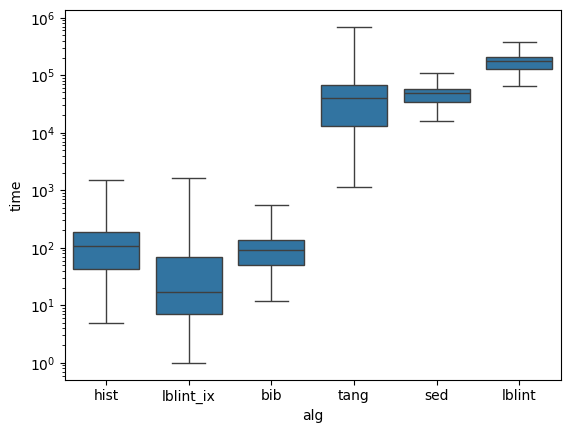

In [13]:
sns.boxplot(data=df, x='alg', y='time', log_scale=True, showfliers=False)

In [14]:
df = pd.DataFrame()
for alg in dataframes['python'].keys():
    if alg == 'tang':
        continue
    times = dataframes['python'][alg][0].copy()
    times['alg'] = alg
    df = pd.concat([df, times])
df.head()

,time,alg
0,0,hist
1,0,hist
2,0,hist
3,0,hist
4,0,hist


/home/lukas/school/jupytervenv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='alg', ylabel='time'>

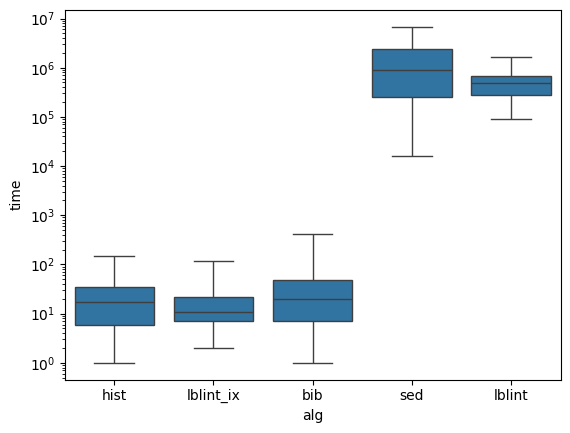

In [15]:
sns.boxplot(data=df, x='alg', y='time', log_scale=True, showfliers=False)

In [16]:
dataframes['sentiment']['hist'].size

AttributeError: 'list' object has no attribute 'size'

Printing  swissprot 0 0


/home/lukas/school/jupytervenv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/lukas/school/jupytervenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lukas/school/jupytervenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lukas/school/jupytervenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarni

Printing  bolzano 0 1


/home/lukas/school/jupytervenv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/lukas/school/jupytervenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lukas/school/jupytervenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lukas/school/jupytervenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarni

Printing  python 1 2


/home/lukas/school/jupytervenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lukas/school/jupytervenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lukas/school/jupytervenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lukas/school/jup

Printing  sentiment 1 0


/home/lukas/school/jupytervenv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/lukas/school/jupytervenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lukas/school/jupytervenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lukas/school/jupytervenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarni

Printing  dblp 1 1


/home/lukas/school/jupytervenv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/lukas/school/jupytervenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lukas/school/jupytervenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lukas/school/jupytervenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarni

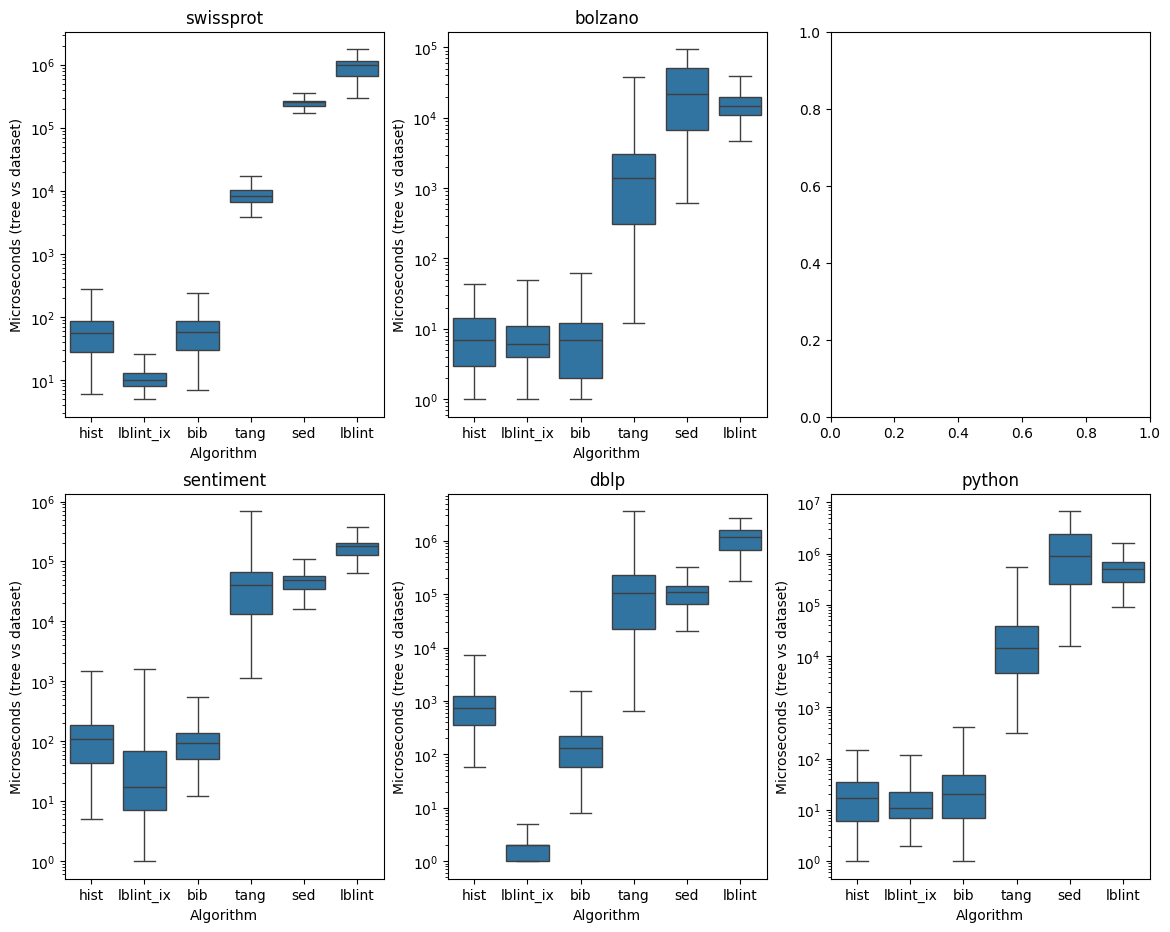

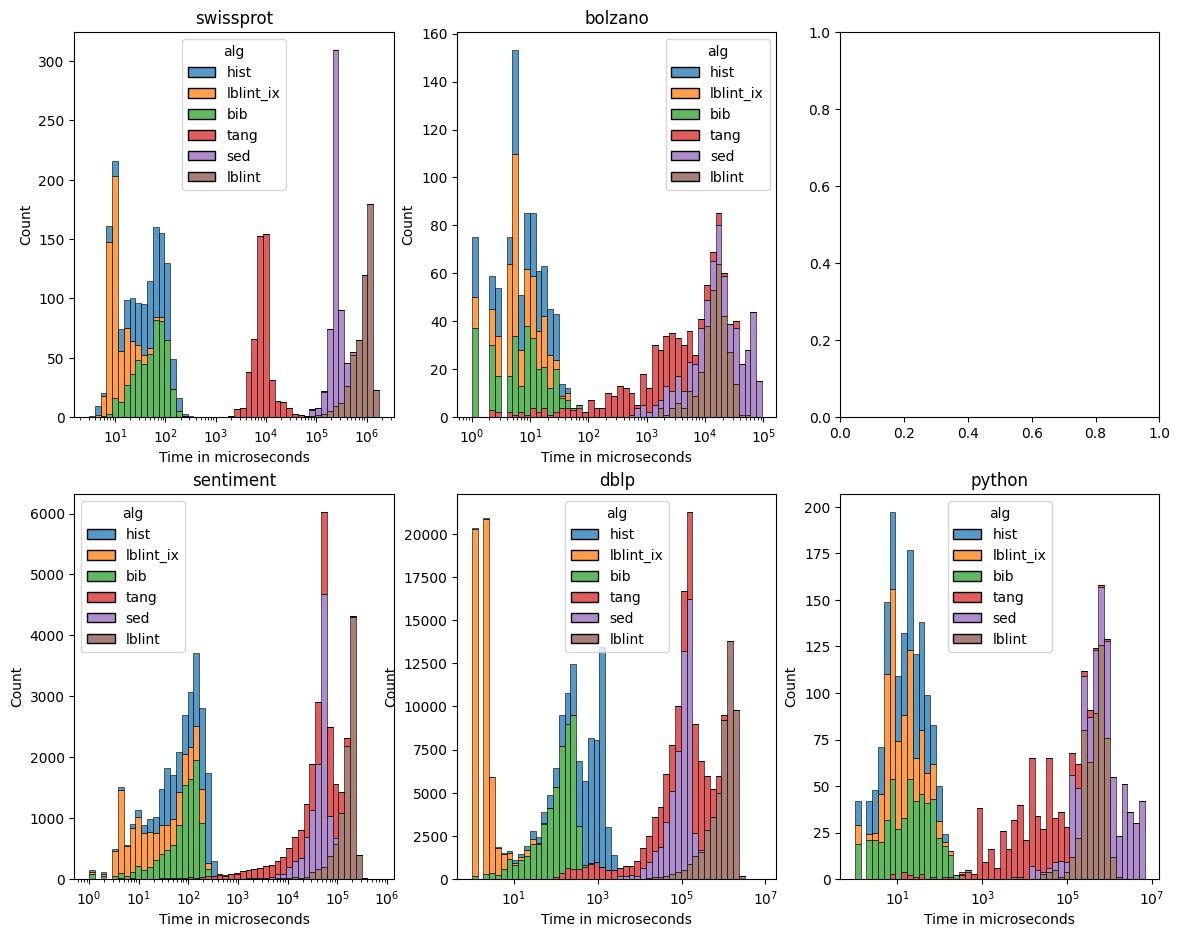

In [26]:
f, axes = plt.subplots(2, 3, figsize=(14, 11))
f, axes2 = plt.subplots(2, 3, figsize=(14, 11))
for i, (ds, x) in enumerate(tested_values):
    ax = int(i >= 2)
    ay = i % 3
    axes[ax][ay].set_title(ds)
    axes2[ax][ay].set_title(ds)
    print('Printing ', ds, ax, ay)
    df = pd.DataFrame()
    for alg in dataframes[ds].keys():
        times = dataframes[ds][alg][0].copy()
        times['alg'] = alg
        df = pd.concat([df, times])
    bp = sns.boxplot(data=df, x='alg', y='time', log_scale=True, showfliers=False, ax=axes[ax][ay])
    bp.set(xlabel='Algorithm', ylabel='Microseconds (tree vs dataset)')
    hp = sns.histplot(data=df, x="time", hue='alg', log_scale=True, multiple="stack", ax=axes2[ax][ay], bins=50)
    hp.set(xlabel='Time in microseconds')

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(14, 11))
for i, (ds, x) in enumerate(tested_values):
    ax = i % 2
    ay = int(i >= 2)
    axes[ax][ay].set_title(ds)
    print('Printing ', ds)
    df = pd.DataFrame()
    for alg in dataframes[ds].keys():
        times = dataframes[ds][alg][0].copy()
        times['alg'] = alg
        df = pd.concat([df, times])
    sns.histplot(data=df, x="time", hue="alg", bins=50, log_scale=True, multiple="stack", ax=axes[ax][ay])

In [ ]:
summary = dataframes[ds][alg][1].copy()
summary['tpt'] = summary["Total Time"] / (summary["Correct trees"] + summary["Incorrect trees"])
summary

alg,bib,hist,lblint,lblint_ix,sed,tang
ds,,,,,,
bolzano,15.936200,30.5181,51.4025,57.5237,68.5367,32.603800
dblp,0.513298,83.0839,95.1992,99.7263,99.9486,0.007155
python,9.881680,27.1360,64.5669,73.0364,87.7432,15.722500
sentiment,1.287830,13.4704,33.3438,37.9065,56.2107,2.606730
swissprot,0.000000,0.0000,0.0000,0.0000,0.0000,0.000000


<Axes: xlabel='alg', ylabel='ds'>

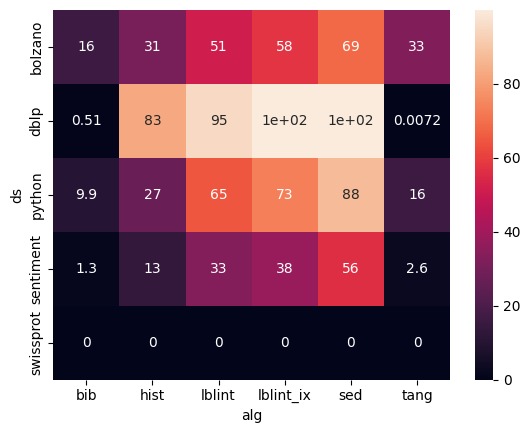

In [27]:
df = pd.DataFrame()

for i, (ds, x) in enumerate(tested_values):
    for alg in dataframes[ds].keys():
        summary = dataframes[ds][alg][1].copy()
        summary['alg'] = alg
        summary['ds'] = ds
        # tpt - time per tree - total time / (number of trees)
        summary['tpt'] = summary["Total Time"] / (summary["Correct trees"] + summary["Incorrect trees"])
        df = pd.concat([df, summary])
df

pivoted = df.pivot(index="ds", columns="alg", values="Precision").fillna(0)
display(pivoted)
sns.heatmap(pivoted, annot=True)

In [ ]:
df = pd.DataFrame()

for i, (ds, x) in enumerate(tested_values):
    for alg in dataframes[ds].keys():
        summary = dataframes[ds][alg][1].copy()
        summary['alg'] = alg
        summary['ds'] = ds
        # tpt - time per tree - total time / (number of trees)
        summary['tpt'] = summary["Total Time"] / (summary["Correct trees"] + summary["Incorrect trees"])
        df = pd.concat([df, summary])
display(df)

pivoted = df.pivot(index="ds", columns="alg", values="tpt").fillna(0)
display(pivoted)
sns.heatmap(pivoted, annot=True)

In [ ]:
df.tail()

In [ ]:
sns.histplot(data=df, x="time", hue="alg", log_scale=True, bins=80)


In [ ]:
sns.histplot(data=dataframes['bolzano']['lblint_ix'][0])

In [ ]:
sns.heatmap()

In [ ]:
glue.pivot(index="Model", columns="Task", values="Score")